In [1]:
import tensorflow as tf
import os
import sys
import random
import cv2
import pafy
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import sys
import time
sys.path.append('.')
from samples.coco import coco
from mrcnn import utils
from mrcnn import model as modellib
from mrcnn import visualize
ROOT_DIR = os.getcwd()
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
IMAGE_DIR = os.path.join(ROOT_DIR, "data")

Using TensorFlow backend.


In [3]:

class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']


precision = 10
from datetime import datetime



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [4]:
dist=0
data_cars=[]
def find_dist(x1,y1,x2,y2):
    dist=pow(((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1)),0.5)
    print(dist)
    return(dist)
a=0
b=0
def getCurrentClock():
    return datetime.now()
i=0

In [7]:

start_time = time.time()

file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

import json
with open('data.json','w') as outfile:
    i=0
    r = results[0]
    for class_id in r['class_ids']:
        #print(class_names[class_id]) 
        data = {class_names[class_id] : {
        "bottom left x":str(r['rois'][i][1]) ,
        "bottom left y" : str(r['rois'][i][2]) ,
        "top right x":str(r['rois'][i][3]) ,
        "top right y" : str(r['rois'][i][0]) }  
        } 
        print("bottom left : "+str(r['rois'][i][1])+","+str(r['rois'][i][2])+"\n top right : " + str(r['rois'][i][3])+","+str(r['rois'][i][0]))
        i+=1
        json.dump(data,outfile)


bottom left : 1092,447
 top right : 1148,406
bottom left : 1200,466
 top right : 1222,414
bottom left : 1011,415
 top right : 1047,380
bottom left : 1345,575
 top right : 1583,386
bottom left : 1157,467
 top right : 1183,412


In [8]:
image=cv2.imread("data/4.png")
cv2.imshow('mi', image)
if cv2.waitKey(0)==ord('q'):
    cv2.destroyAllWindows()

In [83]:
cv2.rectangle(image, (int(data_cars[0]['car']['bottom left x']), int(data_cars[0]['car']['bottom left y'])), (int(data_cars[0]['car']['top right x']), int(data_cars[0]['car']['top right y'])), (255,0,0),5)

list

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
87.09190547921202
-0.157775191085529
parking space is not available between 0  and  1
283.5365937581955
-0.5136532495619484
parking space is available between 0  and  2
87.09190547921202
-0.18490850420214866
parking space is not available between 1  and  0
283.5365937581955
-0.3522193711281932
parking space is not available between 2  and  0
283.5365937581955
-0.5136532495619484


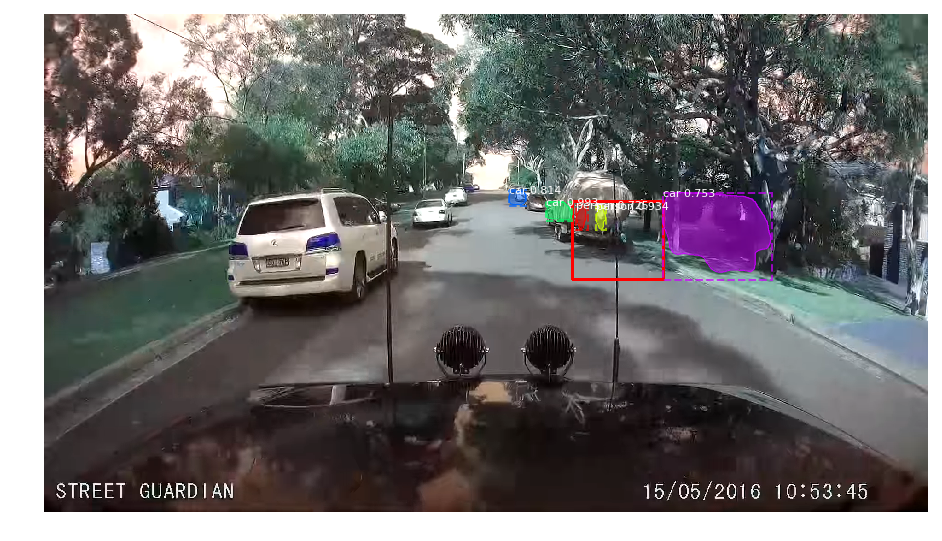

In [27]:
i=0
data_cars=[]
image=cv2.imread("data/4.png")
#image = cv2.resize(image, None, fx=0.75, fy=0.75)

results = model.detect([image], verbose=1,)
for class_id in r['class_ids']:
    
    if class_names[class_id] in("car","truck","bicycle","bus"):
        data_cars.append({class_names[class_id] : {
        "bottom left x":str(r['rois'][i][1]) ,
        "bottom left y":str(r['rois'][i][2]) ,
        "top right x":str(r['rois'][i][3]) ,
        "top right y":str(r['rois'][i][0]) }  
        })
    i+=1
for k in range(len(data_cars)):
    for j in range(len(data_cars)-k):
        if k!=j:
            try:
                final_dist=detect_spaces(image,data_cars,k,j)
            except KeyError:
                pass
            if final_dist >- 0.575 and final_dist<-0.375:
                print("parking space is available between",k," and ",j)
                cv2.rectangle(image, (int(data_cars[j]['car']['bottom left x']), int(data_cars[j]['car']['bottom left y'])), (int(data_cars[k]['car']['top right x']), int(data_cars[k]['car']['top right y'])), (255,0,0),5)
            else:
                print("parking space is not available between",k," and ",j)
final_dist=detect_spaces(image,data_cars,0,2)

if final_dist > -0.5 and final_dist<-0.375:
    print("parking space is available")

"""    
cv2.imshow('mi', image)
if cv2.waitKey(0)==ord('q'):
    cv2.destroyAllWindows()
"""
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
i=0


In [10]:
def detect_spaces(image,data_cars,a,b):
    height, width=image.shape[:2]
    d1=int(data_cars[a]['car']['bottom left x'])
    d2=int(data_cars[a]['car']['bottom left y'])
    e1=int(data_cars[b]['car']['bottom left x'])
    e2=int(data_cars[b]['car']['bottom left y'])
    val=find_dist(d1,d2,e1,e2)
    final_cal=val/(540-d1)
    print(final_cal)
    return final_cal

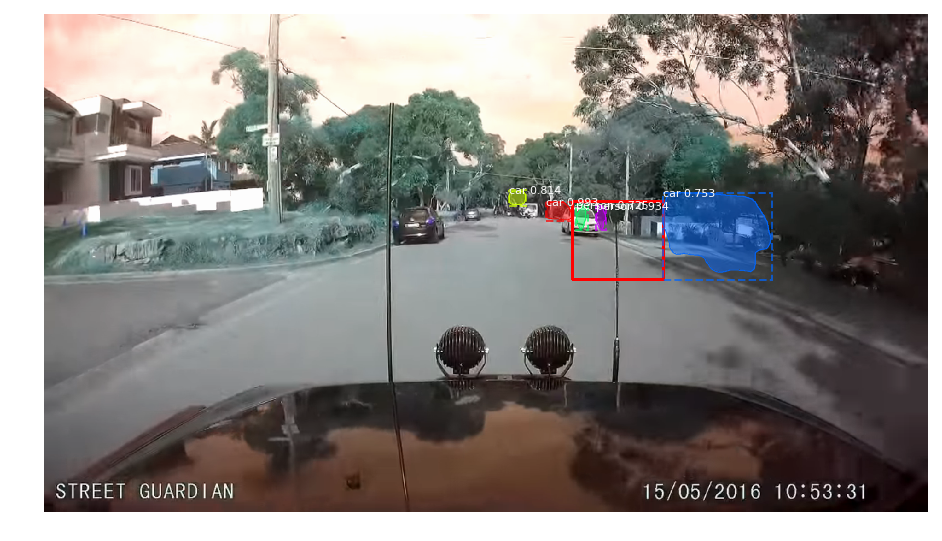

In [24]:
#cv2.rectangle(image, (200,200), (500,500), (255,0,0), 10)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [19]:
cv2.imshow('mi', image)
if cv2.waitKey(0)==ord('q'):
    cv2.destroyAllWindows()
    

In [8]:

def detect_accidents(image, data_cars):
    init_time=time.time()
    end_time=init_time+300
    i=0
    j=0
    k=0
    newer_data=[]
    #init_pos=
    new_data=[]
    for i in range(len(data_cars)):
        new_data.append(data_cars)
        print(new_data)
    for i in range(len(data_cars)):
        new_data.append(data_cars)
    i=0

    time.sleep(5)
    for i in range(len(data_cars)):
        newer_data.append(data_cars)
        if newer_data[i]==new_data[i]:
            k+=1
            j+=1

    if j==1 and k<=ceil(len(new_data)*0.1) and len(new_data)>5:
        print("ALARM")
        
